In [1]:
import spot
spot.setup()

Test the Mealy printer.

In [2]:
g = spot.ltl_to_game('G((a|c) <-> (b|d))', ["b", "d"])

In [3]:
spot.solve_game(g)

True

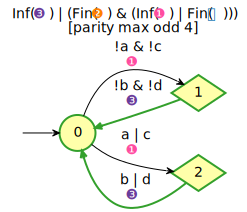

In [4]:
spot.highlight_strategy(g)

In [5]:
x = spot.solved_game_to_separated_mealy(g)

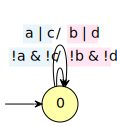

In [6]:
x

In [7]:
x.merge_edges()

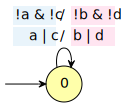

In [8]:
x